## Import Libraries

In [46]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

##### Load the Seattle data set

In [47]:
# Load the Seattle data set
df_seattle = pd.read_csv("/Users/jimmynam/Documents/Academics/SU/DATA_5100/Project/weather/data/seattle_rain.csv")
type(df_seattle)


pandas.core.frame.DataFrame

##### Load the New York data set

In [89]:
# Load the New York data set
df_ny = pd.read_csv("/Users/jimmynam/Documents/Academics/SU/DATA_5100/Project/weather/data/ny_rain.csv")
type(df_ny)

pandas.core.frame.DataFrame

# Explore contents of the Seattle data set

In [90]:
# see the names of the columns and few example values for each column
df_seattle.head(10)

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


In [50]:
# see the columns of each data sets
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [51]:
# Use the info method
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [52]:
# Use shape attribute to se the data frame size
df_seattle.shape

(1658, 10)

# Explore contents of New York Data Set

In [53]:
# Explore the St. Louis data set
df_ny.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,0.00,0.0,0.0
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,0.00,0.0,0.0
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,0.00,0.0,0.0
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,0.49,8.0,1.2
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,0.00,0.0,7.9


In [54]:
# see the columns
df_ny.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

In [55]:
# see the info
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1826 non-null   object 
 1   NAME     1826 non-null   object 
 2   DATE     1826 non-null   object 
 3   PRCP     1826 non-null   float64
 4   SNOW     1826 non-null   float64
 5   SNWD     1826 non-null   float64
dtypes: float64(3), object(3)
memory usage: 85.7+ KB


In [56]:
# see shape attribute of St. Louis data set
df_ny.shape

(1826, 6)

# Unique and Nunique functions

In [57]:
df_seattle['STATION'].unique()

array(['US1WAKG0225'], dtype=object)

In [58]:
df_seattle['STATION'].nunique()

1

In [59]:
df_ny['STATION'].unique()

array(['USW00094789'], dtype=object)

In [60]:
df_ny['STATION'].nunique()

1

# Explore Date column

In [61]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [62]:
df_ny['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1821    2022-12-27
1822    2022-12-28
1823    2022-12-29
1824    2022-12-30
1825    2022-12-31
Name: DATE, Length: 1826, dtype: object

In [63]:
# .max() and .tail()
df_seattle['DATE'].max()

'9/9/22'

In [64]:
df_seattle['DATE'].tail()

1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, dtype: object

In [93]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

/var/folders/xj/cpkhqbds3438q1hvt1nywb2c0000gn/T/ipykernel_1854/3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


In [94]:
df_ny['DATE'] = pd.to_datetime(df_ny['DATE'])

In [95]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [96]:
df_ny['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

# Plotting Data Set

##### Plot the daily precipitation data for Seattle

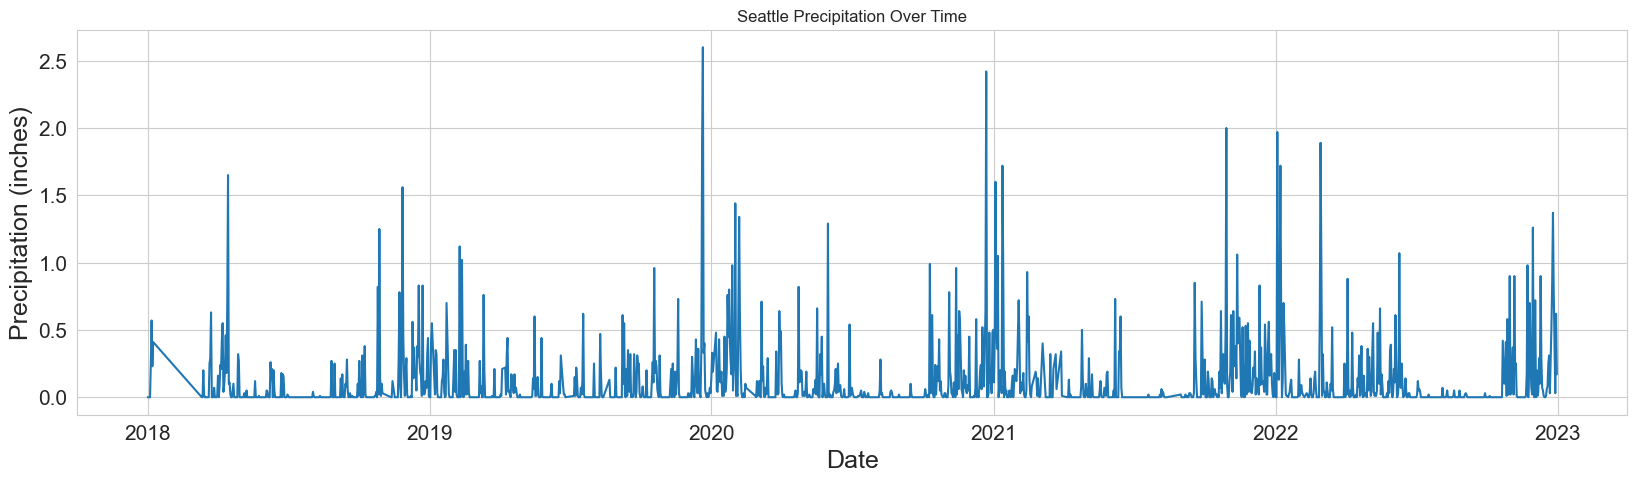

In [97]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_seattle, x='DATE', y='PRCP').set_title('Seattle Precipitation Over Time')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

##### Plot the daily precipitation data for New York City

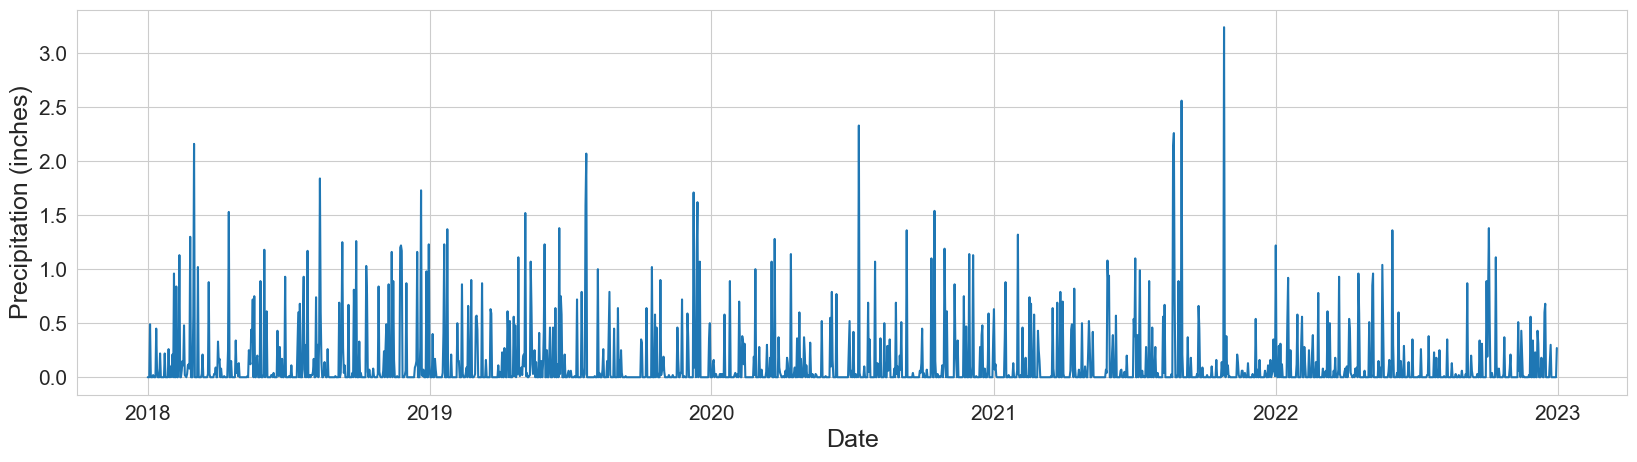

In [98]:
plt.figure(figsize=(20, 5))

sns.lineplot(data=df_ny, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

# Select relevant subsets of the data

In [68]:
df_ny.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,0.00,0.0,0.0
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,0.00,0.0,0.0
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,0.00,0.0,0.0
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,0.49,8.0,1.2
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,0.00,0.0,7.9


In [69]:
df_ny

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,0.00,0.0,0.0
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,0.00,0.0,0.0
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,0.00,0.0,0.0
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,0.49,8.0,1.2
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,0.00,0.0,7.9
...,...,...,...,...,...,...
1821,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2022-12-27,0.00,0.0,0.0
1822,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2022-12-28,0.00,0.0,0.0
1823,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2022-12-29,0.00,0.0,0.0
1824,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2022-12-30,0.00,0.0,0.0


In [70]:
# use loc and iloc
df_ny = df_ny.loc[df_ny['DATE'] >= '2010-01-01']

In [71]:
df_ny.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-01,0.00,0.0,0.0
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-02,0.00,0.0,0.0
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-03,0.00,0.0,0.0
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-04,0.49,8.0,1.2
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2018-01-05,0.00,0.0,7.9


In [72]:
df_ny = df_ny.loc[df_ny['NAME'] >= 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US']


In [73]:
df_ny['STATION'].unique()

array([], dtype=object)


## Join data frames keeping DATE and PRCP columns

In [74]:
df = df_ny[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')

In [75]:
df.head()

,DATE,PRCP_x,PRCP_y
0,1/1/18,NaN,0.00
1,1/1/19,NaN,0.00
2,1/1/20,NaN,0.15
3,1/1/21,NaN,0.11
4,1/1/22,NaN,0.00


In [76]:
df.shape

(1658, 3)

In [77]:
df

,DATE,PRCP_x,PRCP_y
0,1/1/18,NaN,0.00
1,1/1/19,NaN,0.00
2,1/1/20,NaN,0.15
3,1/1/21,NaN,0.11
4,1/1/22,NaN,0.00
...,...,...,...
1653,9/9/18,NaN,0.00
1654,9/9/19,NaN,0.10
1655,9/9/20,NaN,0.00
1656,9/9/21,NaN,0.00


# Rename  columns or values to follow best practices

In [78]:
df = df.rename(columns={'PRCP_x': 'city', 'PRCP_y': 'precipation'})

## rename the city values 'STL' and 'SEA'

In [79]:
df.loc[df['city'] == 'PRCP_x', 'city'] = 'NYC'

/var/folders/xj/cpkhqbds3438q1hvt1nywb2c0000gn/T/ipykernel_1854/2921760816.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NYC' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['city'] == 'PRCP_x', 'city'] = 'NYC'


In [80]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

In [81]:
df.head()

,DATE,city,precipation
0,1/1/18,NaN,0.00
1,1/1/19,NaN,0.00
2,1/1/20,NaN,0.15
3,1/1/21,NaN,0.11
4,1/1/22,NaN,0.00


# Rename the columns to be lowercase using df.rename()

In [82]:
df = df.rename(columns={'DATE': 'date'})

In [83]:
df.head()

,date,city,precipation
0,1/1/18,NaN,0.00
1,1/1/19,NaN,0.00
2,1/1/20,NaN,0.15
3,1/1/21,NaN,0.11
4,1/1/22,NaN,0.00


### Determine the number of non-null values in each column

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1658 non-null   object 
 1   city         0 non-null      object 
 2   precipation  1636 non-null   float64
dtypes: float64(1), object(2)
memory usage: 39.0+ KB


In [85]:
df.notna().sum()

date           1658
city              0
precipation    1636
dtype: int64

In [86]:
df.isna().sum()

date              0
city           1658
precipation      22
dtype: int64

### Determine the number of null precipitation values for Seattle and St. Louis

In [87]:
df.loc[df['city'] == 'SEA', 'precipation'].isna().sum()

np.int64(0)

In [88]:
df.loc[df['city'] == 'NYC', 'precipation'].isna().sum()

np.int64(0)